In [1]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

folder = 'D:/Data_Analyst_Projet/Projet 6/Donnees python/sql/'

vente = pd.read_csv(folder+'df_serie.csv', index_col='date', parse_dates=True)
client = pd.read_csv(folder+'customers_sql.csv')
produit = pd.read_csv(folder+'produit_sql.csv')

In [50]:
client_melt = pd.read_csv(folder+'customers_melt.csv')

In [54]:
client_melt['categ']=client_melt['categ'].astype('object')

In [64]:
client_melt = client_melt.sort_values('ventes_ca', ascending=False).loc[client_melt['ventes_ca']<100000,:].sort_values('client_id').reset_index(drop=True)

In [51]:
client_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19946 entries, 0 to 19945
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        19946 non-null  object 
 1   ventes_nb        19946 non-null  int64  
 2   ventes_ca        19946 non-null  float64
 3   sex              19946 non-null  object 
 4   birth            19946 non-null  int64  
 5   age              19946 non-null  int64  
 6   nb_panier        19946 non-null  int64  
 7   panier_moyen     19946 non-null  float64
 8   frequence_achat  19946 non-null  float64
 9   categ            19946 non-null  int64  
 10  nb_categ         19946 non-null  int64  
 11  ca_categ         19946 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.8+ MB


In [95]:
vente

,id_prod,session_id,client_id,mois,price,categ,sex,birth,age,date2,day,quart_mois,week_day
date,,,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,2022-05,4.18,0,f,1986,37,2022-05-20 13:21:29.043970,20,3,4
2022-02-02 07:55:19.149409,1_251,s_158752,c_8534,2022-02,15.99,1,m,1988,35,2022-02-02 07:55:19.149409,2,1,2
2022-06-18 15:44:33.155329,0_1277,s_225667,c_6714,2022-06,7.99,0,f,1968,55,2022-06-18 15:44:33.155329,18,3,5
2021-06-24 04:19:29.835891,2_209,s_52962,c_6941,2021-06,69.99,2,m,2000,23,2021-06-24 04:19:29.835891,24,4,3
2023-01-11 08:22:08.194479,0_1509,s_325227,c_4232,2023-01,4.99,0,m,1980,43,2023-01-11 08:22:08.194479,11,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-15 13:05:06.246925,0_1551,s_150195,c_8489,2022-01,12.99,0,f,1951,72,2022-01-15 13:05:06.246925,15,2,5
2022-03-19 16:03:23.429229,1_639,s_181434,c_4370,2022-03,10.99,1,f,1977,46,2022-03-19 16:03:23.429229,19,3,5
2022-12-20 04:33:37.584749,0_1425,s_314704,c_304,2022-12,12.99,0,f,1988,35,2022-12-20 04:33:37.584749,20,3,1


In [103]:
periode_ca={'Année':'Y', 'Mois':'M', 'Jour':'D'}
selection_periode_ca = st.selectbox('Choix de la variable x', periode_ca)

In [105]:
periode_ca.keys()

dict_keys(['Année', 'Mois', 'Jour'])

In [107]:
periode_ca.values()

dict_values(['Y', 'M', 'D'])

In [115]:
data=vente.resample('Y')[['price']].sum().reset_index()
data

,date,price
0,2021-12-31,4771752.24
1,2022-12-31,6109958.61
2,2023-12-31,974369.27


<AxesSubplot:xlabel='date', ylabel='price'>

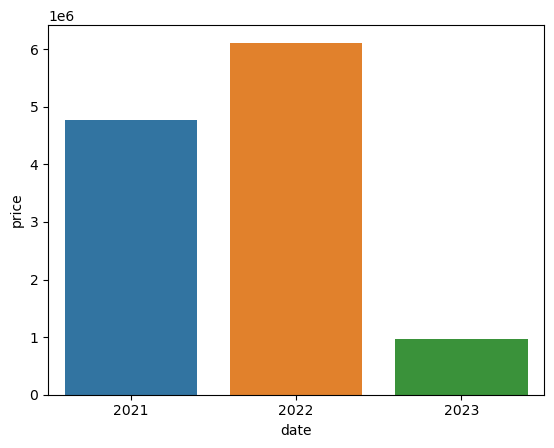

In [111]:
sns.barplot(data=data, x=data['date'].dt.year, y='price')

In [118]:
data.rolling(3).mean()

C:\Users\Raphaël\AppData\Local\Temp\ipykernel_2220\2992817209.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  data.rolling(1).mean()


,price
0,4771752.24
1,6109958.61
2,974369.27


In [112]:
data['date'].dt.year

0    2021
1    2022
2    2023
Name: date, dtype: int64

In [119]:
data=vente.resample('M')[['price']].sum().reset_index()
data

,date,price
0,2021-03-31,482536.37
1,2021-04-30,476258.26
2,2021-05-31,493028.59
3,2021-06-30,484163.04
4,2021-07-31,482877.96
5,2021-08-31,482380.55
6,2021-09-30,507368.36
7,2021-10-31,320873.22
8,2021-11-30,516274.13
9,2021-12-31,525991.76


<AxesSubplot:xlabel='date', ylabel='price'>

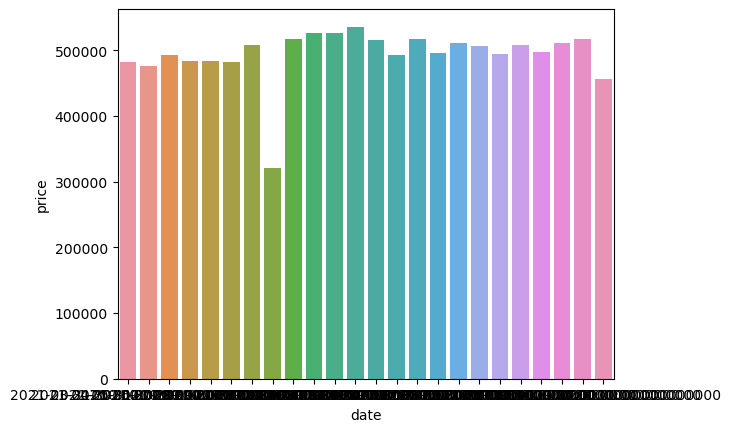

In [100]:
sns.barplot(data=data, x=data['date'], y='price')

In [121]:
data['price'].rolling(3).mean()

0               NaN
1               NaN
2     483941.073333
3     484483.296667
4     486689.863333
5     483140.516667
6     490875.623333
7     436874.043333
8     448171.903333
9     454379.703333
10    522552.693333
11    529024.163333
12    525551.433333
13    514803.336667
14    508674.770000
15    502180.446667
16    508101.413333
17    504517.930000
18    503891.160000
19    502928.950000
20    499672.146667
21    505029.830000
22    508226.783333
23    494884.203333
Name: price, dtype: float64

In [113]:
data=vente.resample('D')[['price']].sum().reset_index()
data

,date,price
0,2021-03-01,16575.86
1,2021-03-02,15497.09
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


In [114]:
data['date'].dt.strftime('%Y-%m')

0      2021-03
1      2021-03
2      2021-03
3      2021-03
4      2021-03
        ...   
725    2023-02
726    2023-02
727    2023-02
728    2023-02
729    2023-02
Name: date, Length: 730, dtype: object

<AxesSubplot:xlabel='date', ylabel='price'>

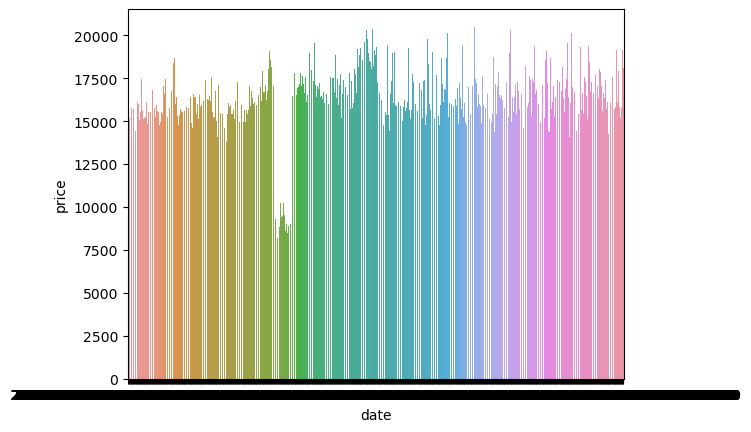

In [102]:
sns.barplot(data=data, x=data['date'], y='price')

In [83]:
data.index

DatetimeIndex(['2021-12-31', '2022-12-31', '2023-12-31'], dtype='datetime64[ns]', name='date', freq='A-DEC')

In [7]:
top_produit = produit.sort_values('sum', ascending=False).head(10)

In [10]:
top_produit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 3097 to 3105
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  10 non-null     object 
 1   sum      10 non-null     float64
 2   count    10 non-null     int64  
 3   price    10 non-null     float64
 4   categ    10 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 480.0+ bytes


<AxesSubplot:xlabel='id_prod', ylabel='sum'>

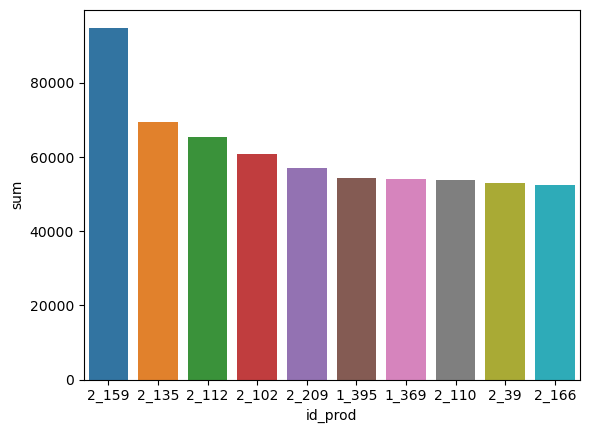

In [15]:
sns.barplot(data=top_produit, x='id_prod', y='sum')

In [30]:
client.select_dtypes(exclude=['object','category']).columns.to_list()

['ventes_nb',
 'ventes_ca',
 'categ_0',
 'categ_1',
 'categ_2',
 'birth',
 'age',
 'nb_panier',
 'panier_moyen',
 'frequence_achat',
 'intercept']

In [36]:
client.drop(columns='intercept', inplace=True)

In [37]:
client['frequence_achat']=round(client['frequence_achat'],2)
client

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen,frequence_achat
0,c_1,39,558.18,30,8,1,m,1955,68,33,16.91,1.62
1,c_10,58,1353.60,20,34,4,m,1956,67,34,39.81,2.42
2,c_100,8,254.85,2,5,1,m,1992,31,5,50.97,0.33
3,c_1000,125,2261.89,43,82,0,f,1966,57,93,24.32,5.21
4,c_1001,102,1812.86,70,31,1,m,1982,41,47,38.57,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,14,189.41,11,3,0,m,1955,68,9,21.05,0.58
8596,c_996,95,1625.58,40,55,0,f,1970,53,79,20.58,3.96
8597,c_997,59,1490.01,23,21,15,f,1994,29,24,62.08,2.46
8598,c_998,53,2779.88,14,11,28,m,2001,22,23,120.86,2.21


In [39]:
client.sort_values('ventes_ca', ascending=False).iloc[4:,:].sort_values('client_id').reset_index(drop=True)

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen,frequence_achat
0,c_1,39,558.18,30,8,1,m,1955,68,33,16.91,1.62
1,c_10,58,1353.60,20,34,4,m,1956,67,34,39.81,2.42
2,c_100,8,254.85,2,5,1,m,1992,31,5,50.97,0.33
3,c_1000,125,2261.89,43,82,0,f,1966,57,93,24.32,5.21
4,c_1001,102,1812.86,70,31,1,m,1982,41,47,38.57,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...
8591,c_995,14,189.41,11,3,0,m,1955,68,9,21.05,0.58
8592,c_996,95,1625.58,40,55,0,f,1970,53,79,20.58,3.96
8593,c_997,59,1490.01,23,21,15,f,1994,29,24,62.08,2.46
8594,c_998,53,2779.88,14,11,28,m,2001,22,23,120.86,2.21


In [43]:
produit['categ']=produit['categ'].astype('object')

In [44]:
produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3266 non-null   object 
 1   sum      3266 non-null   float64
 2   count    3266 non-null   int64  
 3   price    3266 non-null   float64
 4   categ    3266 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 127.7+ KB


In [47]:
produit.rename(columns={'sum':"Chiffre d'affaires produit", 'count':"Nombre de ventes",
                        'price':'Prix unitaire', 'categ':'Catégorie'}, inplace=True)